# Project: Investigate a Dataset - [No-show appointments]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset consists of information about 100 thousands of people who made an appointment with doctor and it is focused on whether patient come to appointment.This dataset includes 110527 rows and 14 columns.Using data given in the dataset ,I am going to know what is importan to predict whether patient shows up or not.Information provided in columns and their names are :
1. PatientId -Identification of a patient
2. AppointmentID - Identification of the appointment
3. Gender - gender of patient (Male or Female)
4. ScheduledDay - the day when patient 
5. AppointmentDay - appointed day	
6. Age - age of patient
7. Neighbourhood	-place where appointment takes place (True or False ;0 fro fales and 1 for True)
8. Scholarship - whether patient enroled in welfare program
9. Hipertension	- whether patien have high blood pressure(True or False)
10. Diabetes	- whether patien have diabetes (True or False)
11. Alcoholism	- whether patient addicted to alcohol (True or False)
12. Handcap	- whether patient have mental or physical disabilities (True or False)
13. SMS_received	- number of SMS sent to patien as reminder
14. No-show - (True or False)
### Question(s) for Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
 >1. Does gender affects going to appointment ?
 >2. Does amount of time patients wait affect showing up ? 
 >3. Do Hipertension and Diabetes affects showing up ?


In [21]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('mode.chained_assignment', 'raise')
import seaborn as sb
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

# Assesing dataset 

In [2]:
#Importing dataset 
df=pd.read_csv("Data2_may_2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df['AppointmentID']=df.loc[:,"AppointmentID"].astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
sum(df.duplicated())

0

Our dataset has 3 columns which are not used ,and `ScheduledDay`,`AppointmentDay`columns are in string format,so they must be changed.There is not duplicates in dataset.There is row with negative age ,so I will drop it

### Data Cleaning


Firstly,I change fromat of 2 columns to `datetime`

In [6]:
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])
df['ScheduledDay']=pd.to_datetime(df["ScheduledDay"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int32              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Then,I drop columns which are not necessary,They are `PatientId`,`AppointmentID`,`Neighbourhood`

In [8]:
#I will change type of 2 columns 
columns_list=["PatientId","AppointmentID","Neighbourhood"]
df.drop(columns_list,axis=1, inplace=True)

Checking

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


I lower names of columns ,so that it will be easier to use

In [10]:
df.rename(columns=lambda x:x.lower(),inplace=True)

In [11]:
#droping row with negative age
df.drop(df[df["age"]==-1.0].index,axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does gender affects going to appointment ?)

In [12]:
# Making mask for those who came and not came
showed_up=df["no-show"]=='No'
not_showed_up=df["no-show"]=='Yes'


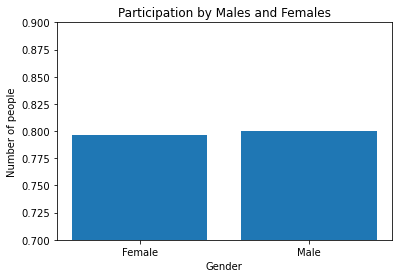

In [13]:
#ploting data
data=df[showed_up].gender.value_counts()/df.gender.value_counts()
plt.bar(["Female",'Male'],data)
plt.title('Participation by Males and Females')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.ylim(0.7,0.9)
plt.show()

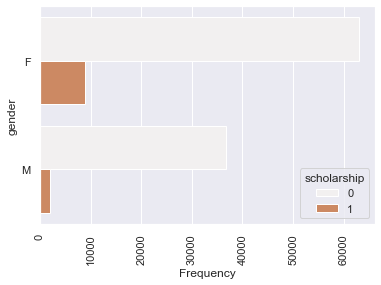

In [75]:
base=sb.color_palette()[1]


sb.set_theme(style="darkgrid")
sb.countplot(data=df,y="gender",hue="scholarship",color=base,orient="h")
plt.xlabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [74]:
df['scholarship']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: scholarship, Length: 110526, dtype: int64

As number of men and woman are not same,I used their proportion.Bar chart shows that Males are more likely to show up.But this is not enough to predict as difference is not high.

### Research Question 2  (Does amount of time patients wait affect showing up ?)

In [14]:
#Making column called days
df["days"]=(df["appointmentday"]-df["scheduledday"]).dt.days
#there are negative values in days column,so i will drop them
dropped=df.drop(df[df["days"]==-1.0].index,axis=0)

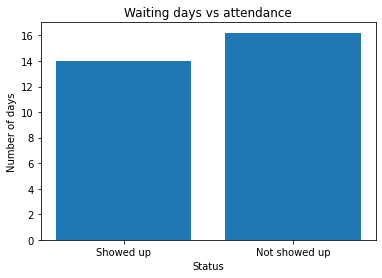

In [15]:
data=dropped.groupby(['no-show'])["days"].mean()
plt.bar(["Showed up",'Not showed up'],data.values)
plt.title('Waiting days vs attendance')
plt.xlabel('Status')
plt.ylabel('Number of days')
plt.show()

I found period of time patients should have waited ,substracting ScheduledDay from AppointmentDayIn. This char we can see that time patients wait affects their showing up.it showed that patients who waited 14 on average showed up and those who waited about 16 days on average did not which means that there is negative correlation between days patients wait and 'showing up'


### Research Question 3  (Do Hipertension and Diabetes affects showing up ?)

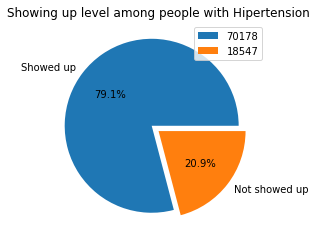

In [16]:
without_hiper=df.query("hipertension==0")["no-show"].value_counts().values
labels=["Showed up","Not showed up"]
explode=[0.1,0]
plt.pie(without_hiper,labels=labels,explode=explode,autopct='%1.1f%%')
plt.title("Showing up level among people with Hipertension")
plt.legend([without_hiper[0],without_hiper[1]])
plt.show()

This pie chart above shows that `79.1`percent ,707178,patients showed up ,while 20,9 percent,18547 patients did not among people wtihout Hipertension 

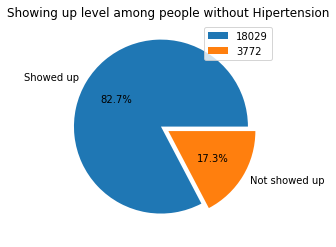

In [17]:
without_hiper=df.query("hipertension==1")["no-show"].value_counts().values
labels=["Showed up","Not showed up"]
explode=[0.1,0]
plt.pie(without_hiper,labels=labels,explode=explode,autopct='%1.1f%%')
plt.title("Showing up level among people without Hipertension")
plt.legend([without_hiper[0],without_hiper[1]])
plt.show()

This pie chart above shows that `82.7`percent ,18029,patients showed up ,while 17.3 percent,3772 patients did not among people with Hipertension .This means that there is positive relationship between presence of desease and "showing up".Belowe I will show it in bar chart

In [18]:

def checking_for_ceartain_feature(df,feature_name):
    #in this  line of code i get portion of patients with no disease and  showed up
    with_no=(df.query(f"{feature_name} == 0")['no-show'].value_counts()/df.query(f"{feature_name} == 0")['no-show'].count()).values[0]
    #in this  line of code i get portion of patients with a Hipertension and  showed up
    with_=(df.query(f"{feature_name} == 1")['no-show'].value_counts()/df.query(f"{feature_name} == 1")['no-show'].count()).values[0]
    plt.bar([f"Not {feature_name}",f"{feature_name}"],[with_no,with_])
    plt.title(f'Patients with {feature_name} vs attendance')
    plt.xlabel('Status')
    plt.ylabel('Portion of patients')
    plt.show()

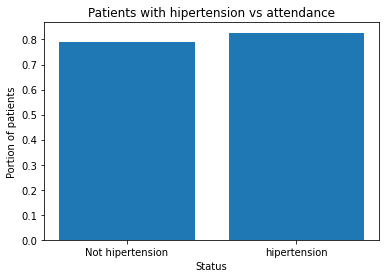

In [19]:
checking_for_ceartain_feature(df,"hipertension")



This bar chart is made of proportion of people without hipertension and with it,and it shows that people with hipertension are likely to go to appointment

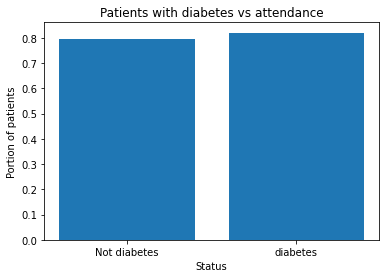

In [20]:
checking_for_ceartain_feature(df,"diabetes")

This bar char also shows the same result,but for Diabetes.(Proportion used aslo,as samples are not same number for each type  

<a id='conclusions'></a>
## Conclusions

> In this analysis ,I tried to know which features affects the  performance of patients(wether they show up or not).First feature was their gender ,it turned out that it doesn't affect much(I used proportion of genders as females is much more than males).Second feature is amount of time patients waited,it showed that patients who waited 14 on average showed up and those who waited about 16 days on average did not which means that there is negative correlation between days patients wait and 'showing up'.When I substract ScheduledDay from AppointmentDay ,I got negative days which may mean that datetime is not appropriate,then I droped about 3 thousand rows.So if it were correct,result would be more accurate.I also used proportions for last 2 features,because number of patients with certain disease and without was not same and they showed that patients with disease are more likely to show up.   




### Limitations
> In this dataset,place where appointment take place is given but there is not any information about place where patients are from ,I mean if we knew distances and it were far,we would assume that patient chose another one which is nearer.As many columns are categorical it is hard to see correlation.





This is website used to find how to extract days:
https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas